In [1]:
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df = pd.read_table("babyboom.dat.txt", header=None, sep='\s+',
                   names=['24hrtime', 'sex', 'weight', 'minutes'])
df.head()

,24hrtime,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [3]:
df.minutes.mean()

788.7272727272727

In [6]:
df[["weight", "minutes"]].describe()

,weight,minutes
count,44.000000,44.000000
mean,3275.954545,788.727273
std,528.032458,416.066931
min,1745.000000,5.000000
25%,3141.500000,482.750000
50%,3404.000000,846.500000
75%,3571.750000,1158.500000
max,4162.000000,1435.000000


In [7]:
df.corr()

,24hrtime,sex,weight,minutes
24hrtime,1.000000,0.028027,0.075636,0.999840
sex,0.028027,1.000000,0.228751,0.031815
weight,0.075636,0.228751,1.000000,0.079616
minutes,0.999840,0.031815,0.079616,1.000000


In [19]:
plt.rcParams["figure.figsize"] = (20,15)

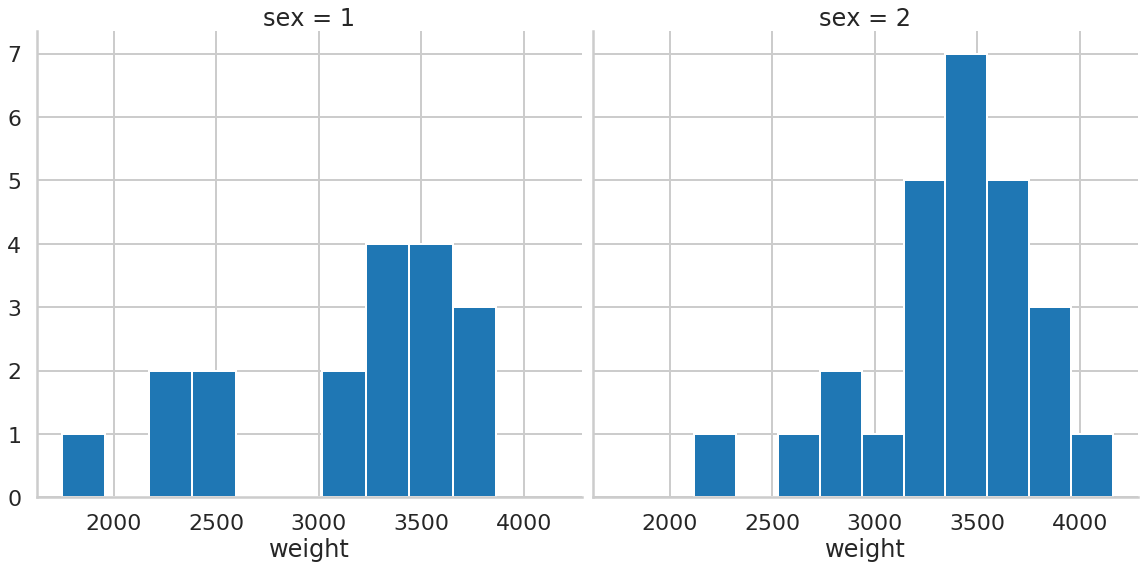

In [14]:
g = sns.FacetGrid(col="sex", data=df, height=8)
g.map(plt.hist, "weight");

Text(0, 0.5, 'exponential pdf')

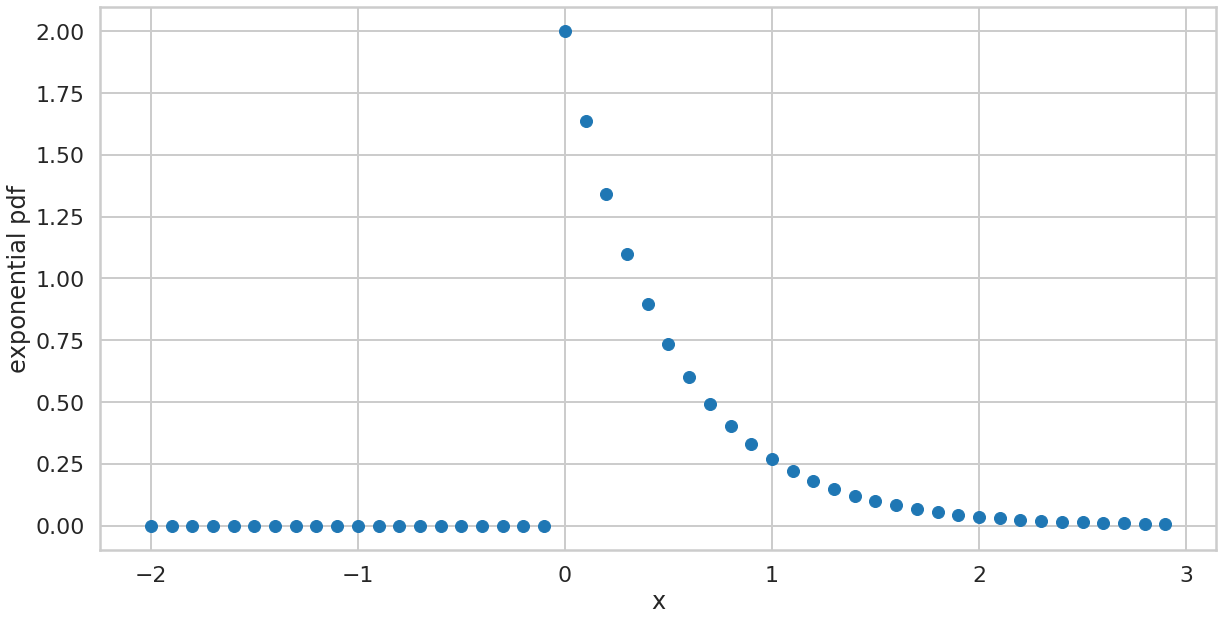

In [15]:
f = lambda x, l: l*np.exp(-l*x)*(x > 0)
xpts = np.arange(-2, 3, 0.1)
plt.plot(xpts, f(xpts, 2), 'o');
plt.xlabel("x")
plt.ylabel("exponential pdf")

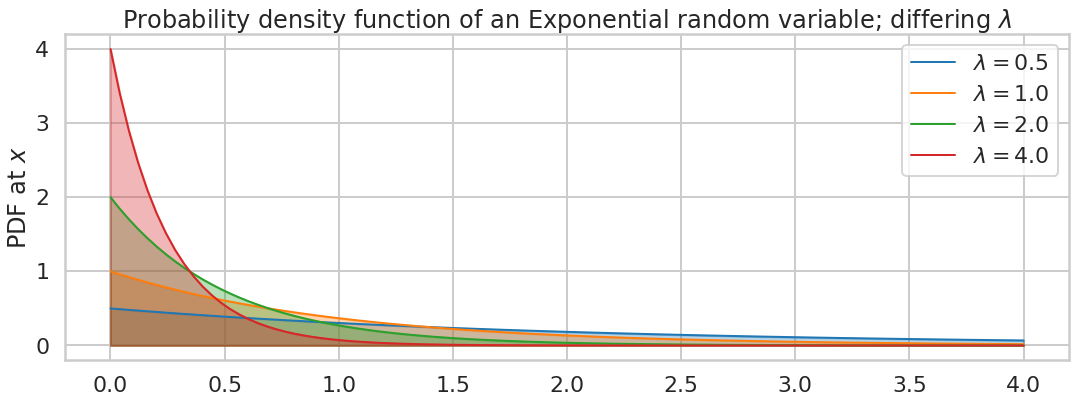

In [22]:
from scipy.stats import expon

x = np.linspace(0, 4, 100)
colors=sns.color_palette()

lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(18, 6))
for l, c in zip(lambda_, colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2,
             color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.title("Probability density function of an Exponential random variable; differing $\lambda$");